<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# web location:
web_csv = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'
local_csv = './datasets/NHL_Data_GA.csv'

### 1. Load the NHL data

In [5]:
# A:
NHL = pd.read_csv(web_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [23]:
# A:
NHL.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [24]:
NHL.shape

(90, 28)

In [19]:
NHL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
Team    90 non-null object
PTS     90 non-null int64
Rank    90 non-null int64
TOI     90 non-null object
GF      90 non-null int64
GA      90 non-null int64
GF60    90 non-null float64
GA60    90 non-null float64
GF%     90 non-null float64
SF      90 non-null int64
SA      90 non-null int64
SF60    90 non-null float64
SA60    90 non-null float64
SF%     90 non-null float64
FF      90 non-null int64
FA      90 non-null int64
FF60    90 non-null float64
FA60    90 non-null float64
FF%     90 non-null float64
CF      90 non-null int64
CA      90 non-null int64
CF60    90 non-null float64
CA60    90 non-null float64
CF%     90 non-null float64
Sh%     90 non-null float64
Sv%     90 non-null float64
PDO     90 non-null int64
PIM     90 non-null int64
dtypes: float64(14), int64(12), object(2)
memory usage: 19.8+ KB


In [14]:
NHL.describe().T

,count,mean,std,min,25%,50%,75%,max
PTS,90.0,91.977778,12.524114,62.00,82.2500,92.500,102.000,121.00
Rank,90.0,2.022222,0.820767,1.00,1.0000,2.000,3.000,3.00
GF,90.0,83.288889,10.376339,57.00,76.0000,84.000,90.000,115.00
GA,90.0,83.288889,9.694484,64.00,75.5000,84.000,89.000,107.00
GF60,90.0,2.442222,0.325331,1.70,2.2325,2.400,2.600,3.45
GA60,90.0,2.444000,0.313522,1.73,2.2025,2.495,2.670,3.24
GF%,90.0,49.981111,4.644554,38.00,46.8250,49.700,53.625,61.20
SF,90.0,1068.333333,95.929047,815.00,1011.5000,1072.000,1143.000,1311.00
SA,90.0,1068.333333,75.514118,868.00,1022.2500,1072.000,1125.750,1245.00
SF60,90.0,31.252222,2.237637,25.80,29.5500,31.400,32.775,35.60


In [25]:
# A:
NHL.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

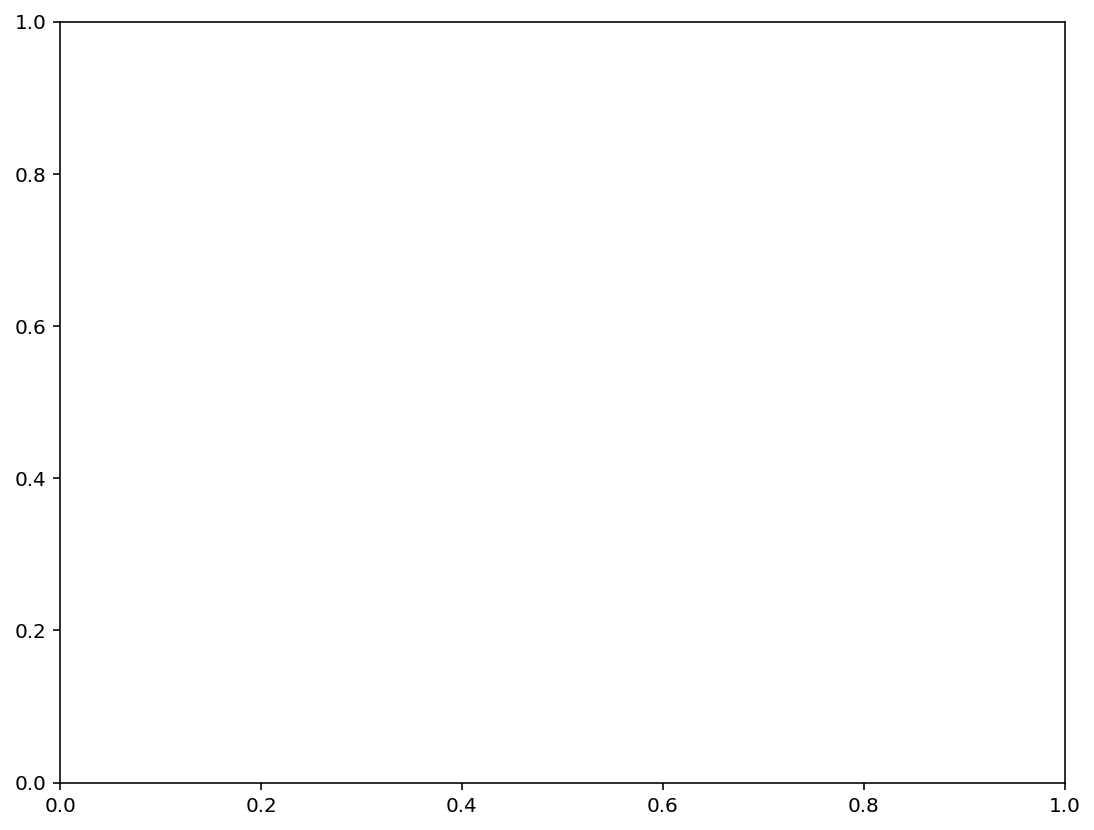

In [27]:
corr = NHL.corr()

fig, ax = plt.subplots(figsize=(9,7))

mask = np.zeros_like(corr, dtype=np.bool)


plt.show()

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [16]:
# A:
NHL.Rank.describe()

count    90.000000
mean      2.022222
std       0.820767
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Rank, dtype: float64

### 4. What is the baseline accuracy?

In [6]:
# A:

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [7]:
# A:

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [8]:
# A:

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [9]:
# A:

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [10]:
# A:

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [11]:
# A:

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [12]:
# A:

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [13]:
# A:

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [14]:
# A: